In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
customers=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/olist_customers_dataset.csv')
location=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/olist_geolocation_dataset.csv')
order_items=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/olist_order_items_dataset.csv')
order_payments=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/olist_order_payments_dataset.csv')
order_reviews=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/olist_order_reviews_dataset.csv')
orders=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/olist_orders_dataset.csv')
products=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/olist_products_dataset.csv')
sellers=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/olist_sellers_dataset.csv')
translation=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/product_category_name_translation.csv')

# 제품 이름 번역
products_trans=products.merge(translation,on='product_category_name',how='left')
products_trans.drop(columns='product_category_name',inplace=True)
products_trans.insert(1,'product_category_name',products_trans['product_category_name_english'])
products_trans.drop(columns='product_category_name_english',inplace=True)
products_trans.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


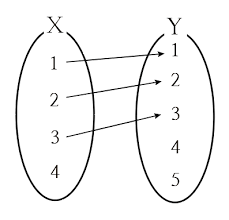

In [ ]:
# 세분화 등급화가 위와 같이 관계를 가지는 것을 보고 싶음

In [ ]:
# 통계적으로 더 보고 싶을 때, anova


### 데이터 분포 확인 + 변환 + scailing

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/seller_metrics_all_fillna.csv')
df.head()

,seller_id,months_with_sale,recency,frequency,monetary,delayed_count,delay_rate,payment_mix_index,payment_concentration,unique_category_count,avg_review_score,total_reviews_x,within_2_days_count,avg_response_time,within_2_days_rate
0,0015a82c2db000af6aaaf3ae2ecb0532,2,315,3,2748.06,0,0.00,-0.00,1.00,1,3.67,3.0,2,1 days 11:50:14,0.67
1,001cca7ae9ae17fb1caed9dfb1094831,17,47,200,48349.22,12,0.06,0.94,0.77,2,3.90,236.0,171,1 days 21:22:06.593220338,0.72
2,002100f778ceb8431b7a1020ff7ab48f,8,139,51,2445.64,9,0.18,1.32,0.56,1,3.98,56.0,43,1 days 14:33:12,0.77
3,003554e2dce176b5555353e4f3555ac8,1,257,1,139.38,0,0.00,-0.00,1.00,0,5.00,1.0,1,0 days 09:05:47,1.00
4,004c9cd9d87a3c30c522c48c4fc07416,17,118,158,27810.35,10,0.06,0.88,0.79,1,4.13,173.0,127,2 days 03:16:29.653179190,0.73


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3053 entries, 0 to 3052
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   seller_id              3053 non-null   object 
 1   months_with_sale       3053 non-null   int64  
 2   recency                3053 non-null   int64  
 3   frequency              3053 non-null   int64  
 4   monetary               3053 non-null   float64
 5   delayed_count          3053 non-null   int64  
 6   delay_rate             3053 non-null   float64
 7   payment_mix_index      3053 non-null   float64
 8   payment_concentration  3053 non-null   float64
 9   unique_category_count  3053 non-null   int64  
 10  avg_review_score       3053 non-null   float64
 11  total_reviews_x        3053 non-null   float64
 12  within_2_days_count    3053 non-null   int64  
 13  avg_response_time      3053 non-null   object 
 14  within_2_days_rate     3053 non-null   float64
dtypes: f

In [ ]:
df['avg_response_time'] = pd.to_timedelta(df['avg_response_time'])
df['avg_response_time_hours'] = df['avg_response_time'].dt.total_seconds() / 3600
df['avg_response_time_hours']

,avg_response_time_hours
0,35.837222
1,45.368498
2,38.553333
3,9.096389
4,51.274904
...,...
3048,38.619583
3049,43.066736
3050,38.225972
3051,75.085241


In [ ]:
df['avg_response_time_hours'].describe()

,avg_response_time_hours
count,3053.000000
mean,59.040163
std,173.489502
min,0.000000
25%,26.187037
50%,40.468889
75%,57.265705
max,7217.597501


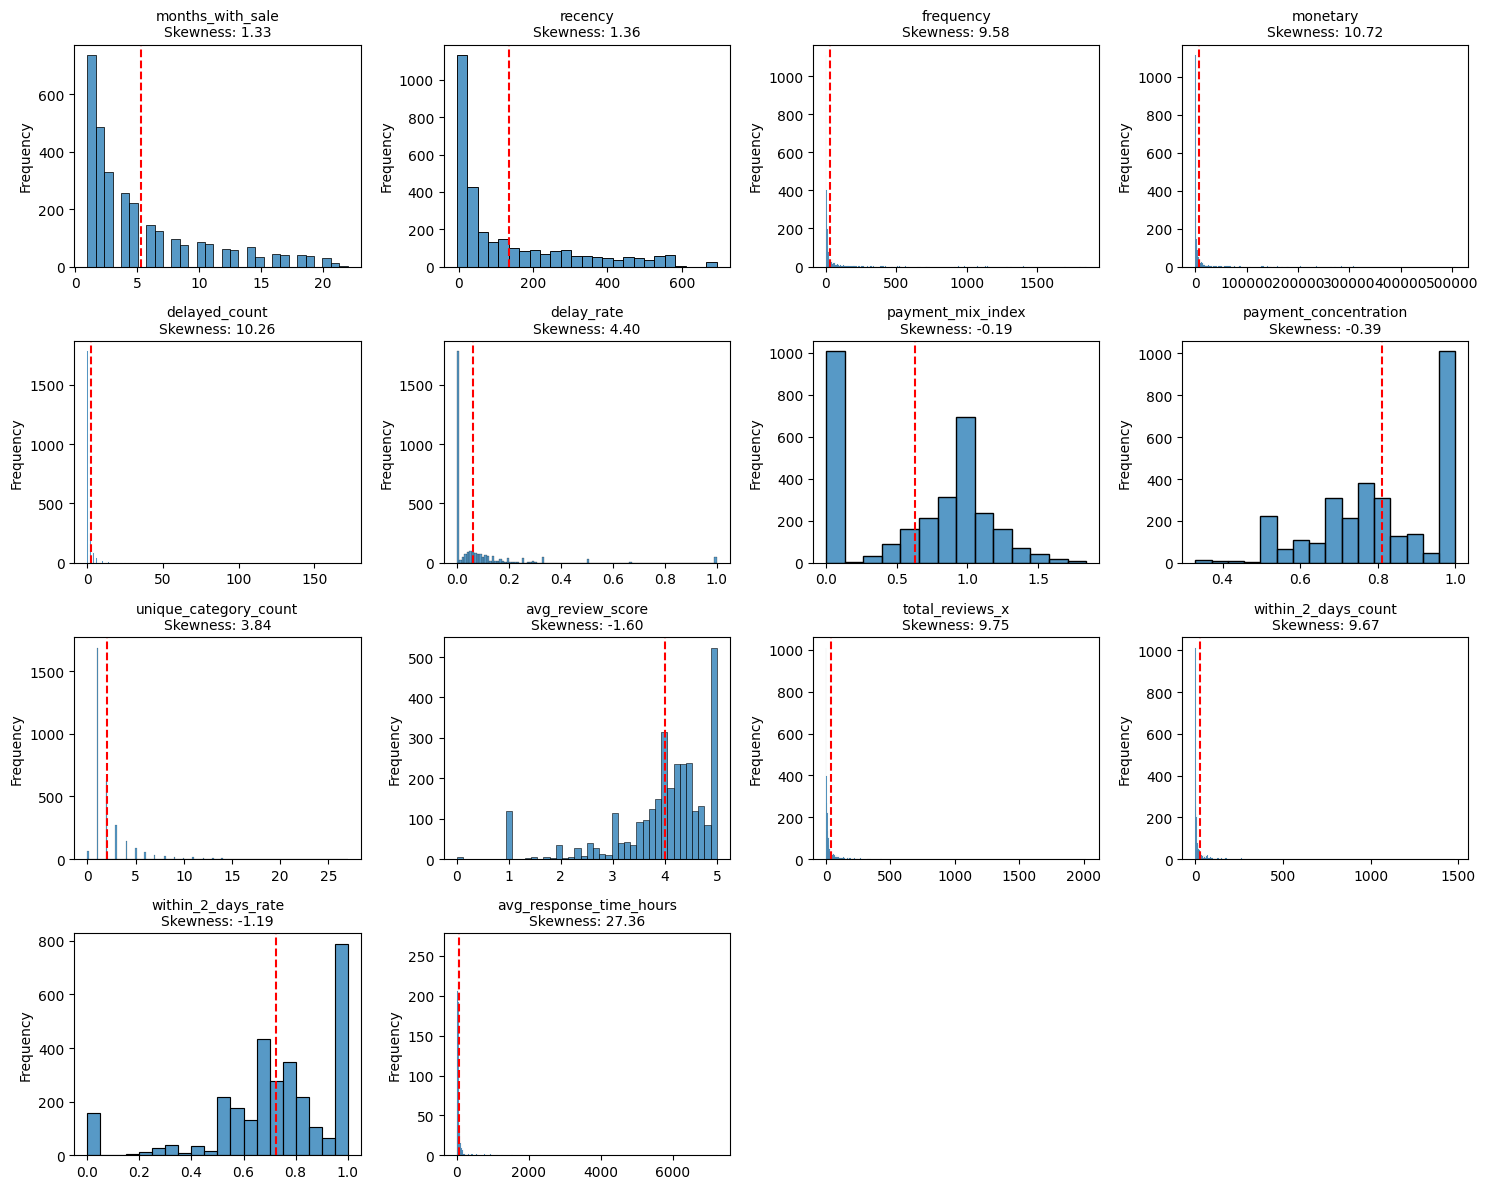

In [ ]:
skewness = df.select_dtypes(include=['float64', 'int64']).skew() # 왜도
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns # 수치형 컬럼(시간 새로 구한거 추가)

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=False)
    plt.title(f'{col}\nSkewness: {skewness[col]:.2f}', fontsize=10)
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.axvline(df[col].mean(), color='red', linestyle='--')

plt.tight_layout()
plt.show()
# frequency, monetary, delayed_count, total_reviews_x, avg_response_time_hours 등 너무 치우쳐저 있음(왜도 참고)
# 로그 변환을 통한 왜곡된 분포 대칭적으로 변환할 필요 있음.

In [ ]:
# 양의 왜도 높았던 feature 선택
columns_to_log_transform = [
    'frequency',
    'monetary',
    'delayed_count',
    'delay_rate',
    'unique_category_count',
    'total_reviews_x',
    'within_2_days_count',
    'avg_response_time_hours'
]

df_log_transformed = df.copy()
for col in columns_to_log_transform:
    df_log_transformed[col] = df_log_transformed[col].apply(lambda x: np.log1p(x))

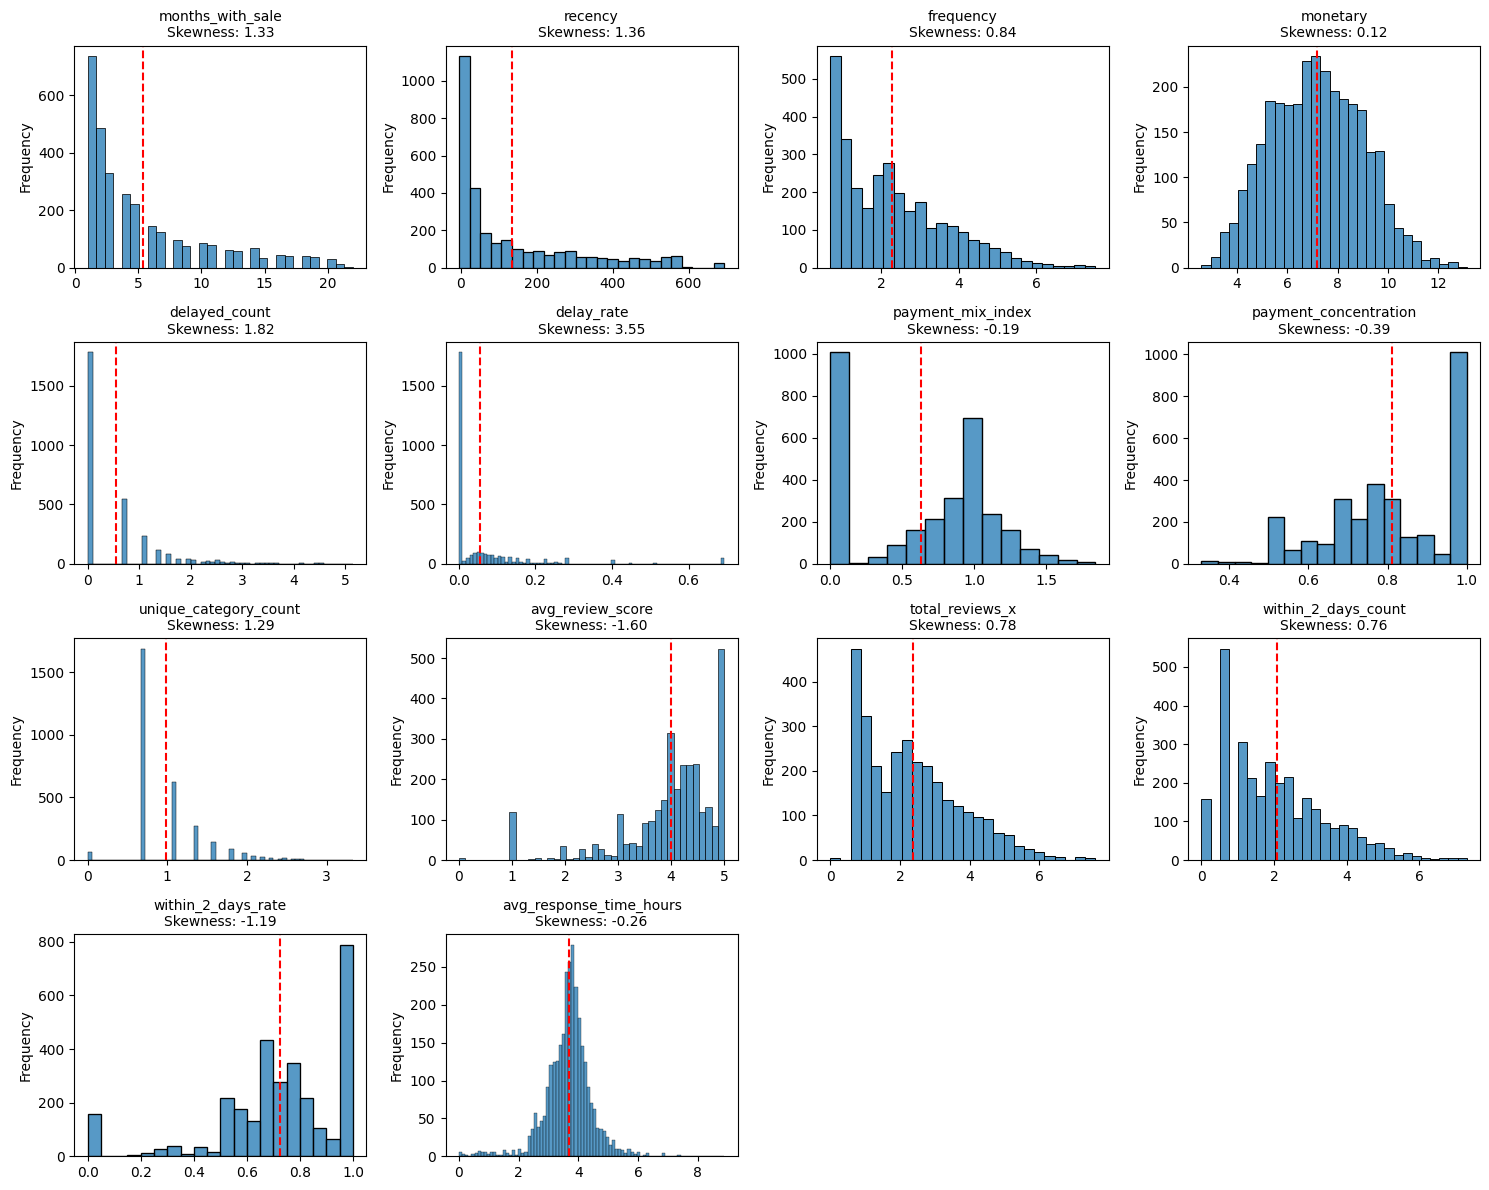

In [ ]:
skewness = df_log_transformed.select_dtypes(include=['float64', 'int64']).skew() #
numeric_columns = df_log_transformed.select_dtypes(include=['float64', 'int64']).columns # 수치형 컬럼(시간 새로 구한거 추가)

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_log_transformed[col], kde=False)
    plt.title(f'{col}\nSkewness: {skewness[col]:.2f}', fontsize=10)
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.axvline(df_log_transformed[col].mean(), color='red', linestyle='--')
    plt.tight_layout()

plt.show()

# 로그 변환 분포가 이전에 비해 고르게 분포

In [ ]:
# min-max scailing 진행
# std-scailing 안쓴 이유: 로그 변환을 통해 한번 변환한 값을 다시 평균이 0, 표준편차 1인 값으로 만들면 데이터가 너무 뭉개질 것 같아서
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

all_numeric_columns = df_log_transformed.select_dtypes(include=['float64', 'int64']).columns

df_scaled = df_log_transformed.copy()
df_scaled[all_numeric_columns] = scaler.fit_transform(df_scaled[all_numeric_columns])

df_scaled.head()

,seller_id,months_with_sale,recency,frequency,monetary,delayed_count,delay_rate,payment_mix_index,payment_concentration,unique_category_count,avg_review_score,total_reviews_x,within_2_days_count,avg_response_time,within_2_days_rate,avg_response_time_hours
0,0015a82c2db000af6aaaf3ae2ecb0532,0.047619,0.457797,0.101505,0.505670,0.000000,0.000000,0.000000,1.000000,0.208015,0.734,0.182135,0.150430,1 days 11:50:14,0.67,0.405937
1,001cca7ae9ae17fb1caed9dfb1094831,0.761905,0.074392,0.675114,0.777319,0.497730,0.084064,0.510870,0.656716,0.329695,0.780,0.718409,0.704830,1 days 21:22:06.593220338,0.72,0.431837
2,002100f778ceb8431b7a1020ff7ab48f,0.333333,0.206009,0.477117,0.494629,0.446818,0.238787,0.717391,0.343284,0.208015,0.796,0.531187,0.518157,1 days 14:33:12,0.77,0.413944
3,003554e2dce176b5555353e4f3555ac8,0.000000,0.374821,0.000000,0.223842,0.000000,0.000000,0.000000,1.000000,0.000000,1.000,0.091068,0.094910,0 days 09:05:47,1.00,0.260251
4,004c9cd9d87a3c30c522c48c4fc07416,0.761905,0.175966,0.640788,0.724923,0.465313,0.084064,0.478261,0.686567,0.208015,0.826,0.677811,0.664373,2 days 03:16:29.653179190,0.73,0.445332


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled2 = df_log_transformed.copy()
df_scaled2[all_numeric_columns] = scaler.fit_transform(df_scaled[all_numeric_columns])
df_scaled2.head()

,seller_id,months_with_sale,recency,frequency,monetary,delayed_count,delay_rate,payment_mix_index,payment_concentration,unique_category_count,avg_review_score,total_reviews_x,within_2_days_count,avg_response_time,within_2_days_rate,avg_response_time_hours
0,0015a82c2db000af6aaaf3ae2ecb0532,-0.671867,1.073659,-0.647444,0.406528,-0.663540,-0.495742,-1.291514,1.137649,-0.635588,-0.356216,-0.714304,-0.724344,1 days 11:50:14,-0.224413,-0.090886
1,001cca7ae9ae17fb1caed9dfb1094831,2.344026,-0.527102,2.202388,1.974368,2.423210,0.027809,0.642859,-0.247312,0.238937,-0.110186,2.215256,2.227540,1 days 21:22:06.593220338,-0.022903,0.193657
2,002100f778ceb8431b7a1020ff7ab48f,0.534490,0.022413,1.218692,0.342800,2.107472,0.991420,1.424839,-1.511843,-0.635588,-0.024610,1.192500,1.233607,1 days 14:33:12,0.178606,-0.002917
3,003554e2dce176b5555353e4f3555ac8,-0.872926,0.727226,-1.151746,-1.220068,-0.663540,-0.495742,-1.291514,1.137649,-2.130598,1.066480,-1.211789,-1.019953,0 days 09:05:47,1.105549,-1.691386
4,004c9cd9d87a3c30c522c48c4fc07416,2.344026,-0.103020,2.031849,1.671964,2.222171,0.027809,0.519388,-0.126881,-0.635588,0.135844,1.993477,2.012129,2 days 03:16:29.653179190,0.017399,0.341914


### Feature Selection
- 하는 이유: 지표 분석을 통해 지표를 추출하였지만, 학습에 가장 좋은 지표를 선택하는 과정 역시 필요
- 1. 군집 분석:
  - 먼저 군집 분석을 수행한 후, 모든 지표를 가지고 군집화 했을 때의 군집이 잘 형성되는지
- 2. PCA:
  - 여러 개의 지표를 주성분으로 압축하여 중요한 정보로 보존, 차원 감소
  - 각 주성분이 데이터의 분산 얼마나 설명하는지 파악해서,기여도 높은 지표 파악

---
- 군집 갯수 평가 지표:
  - **elbow**: 클러스터의 중심 간의 거리를 측정한 후 제곱하여 모든 클러스터에 대한 제곱 오차를 합산
    -  SSE의 감소율이 급격히 줄어드는 지점
    - 군집 간 분리 반영 x
    - 데이터가 비교적 단순하고, 군집 내 응집도를 중점적으로 평가
  - **silhouette**:
    - 군집이 효율적으로 잘 분리되었는가?
    - 응집도 & 군집 간 분리 모두 평가
    - 계산 복잡하나, 복잡한 데이터셋에서 유리


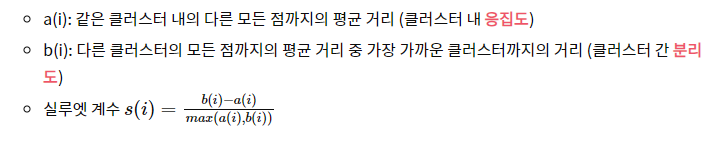

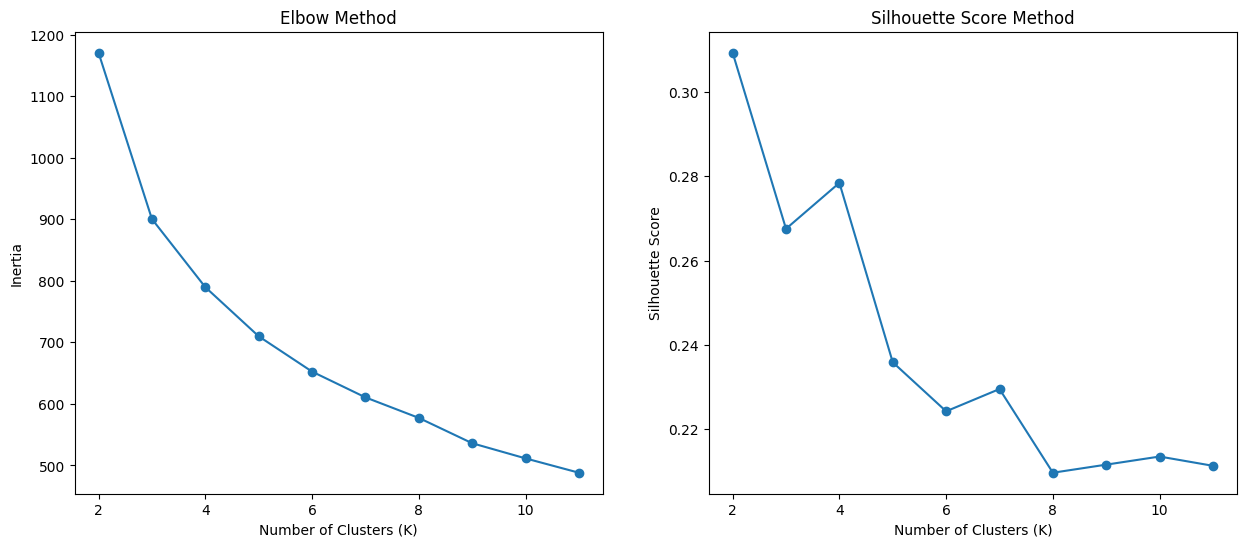

In [ ]:
# 모든 지표 사용 군집 분석
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X=df_scaled.drop(columns=['seller_id','avg_response_time'])

inertia = []
silhouette_scores = []

K_range = range(2, 12)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(K_range, inertia, marker='o')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')

axes[1].plot(K_range, silhouette_scores, marker='o')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score Method')

plt.show()

In [ ]:
X2=df_scaled2.drop(columns=['seller_id','avg_response_time'])

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

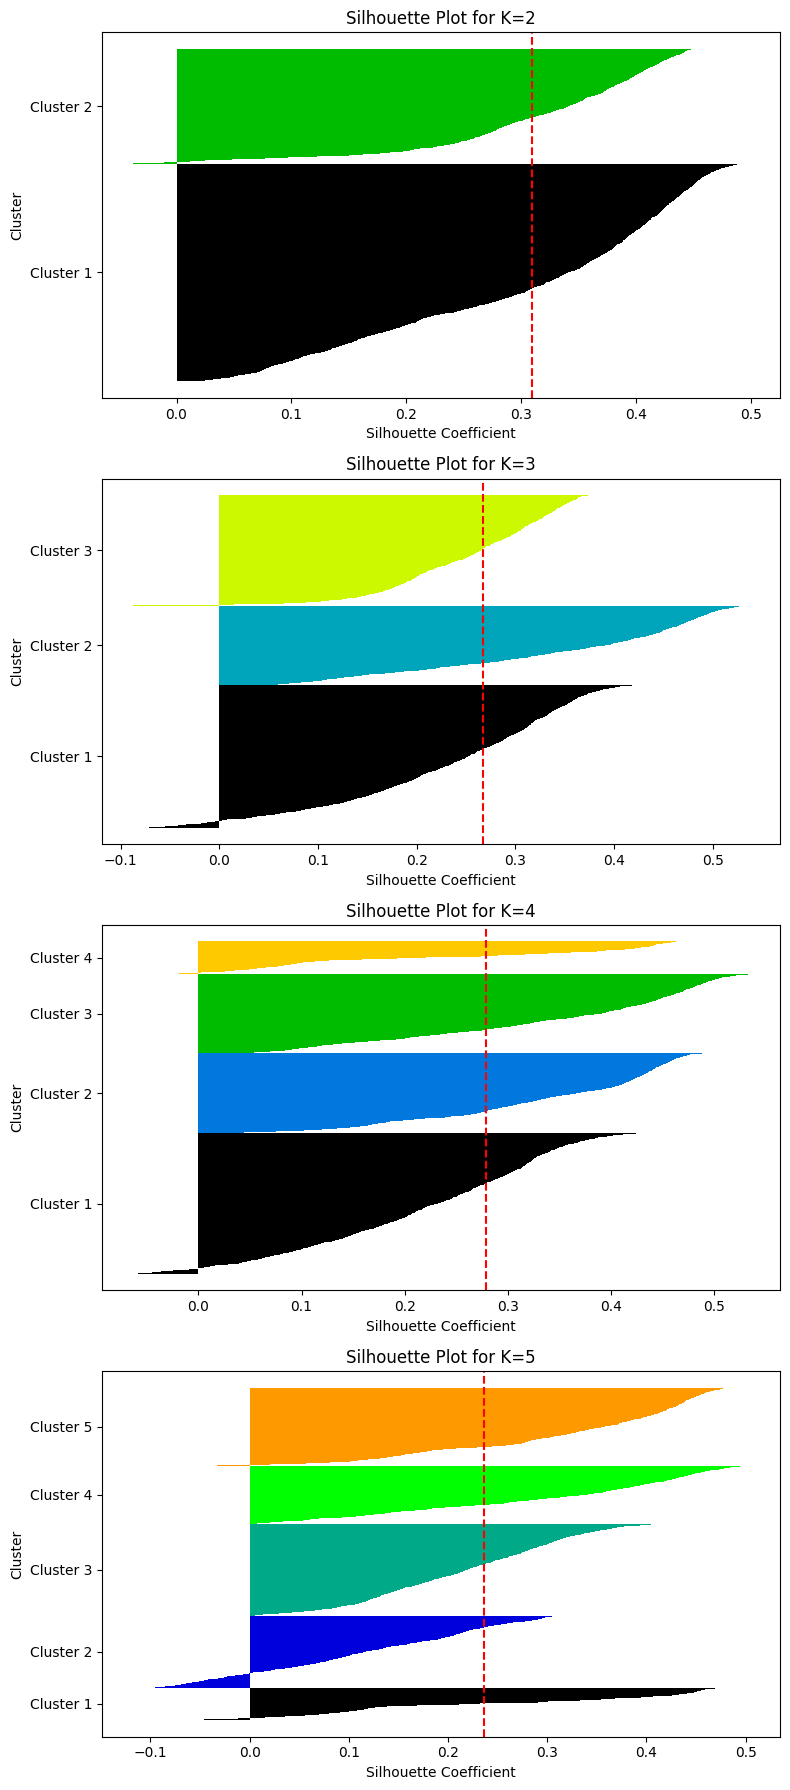

In [ ]:
# 모든 지표 사용 시 실루엣 플롯
K_range = range(2, 6)

fig, axes = plt.subplots(len(K_range), 1, figsize=(8, 18))

for idx, k in enumerate(K_range):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_vals = silhouette_samples(X, cluster_labels)

    y_lower, y_upper = 0, 0
    yticks = []

    for i in range(k):
        ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        ith_cluster_silhouette_vals.sort()
        y_upper += len(ith_cluster_silhouette_vals)
        color = cm.nipy_spectral(float(i) / k)
        axes[idx].barh(range(y_lower, y_upper), ith_cluster_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_lower + y_upper) / 2)
        y_lower = y_upper

    axes[idx].axvline(x=silhouette_vals.mean(), color="red", linestyle="--")
    axes[idx].set_yticks(yticks)
    axes[idx].set_yticklabels([f"Cluster {i+1}" for i in range(k)])
    axes[idx].set_xlabel("Silhouette Coefficient")
    axes[idx].set_ylabel("Cluster")
    axes[idx].set_title(f"Silhouette Plot for K={k}")

plt.tight_layout()
plt.show()


In [ ]:
# 모든 지표를 사용해서 엘보우와 실루엣 점수 확인 결과, 최적의 군집을 2개 이상으로 잘 못나누고, 실루엣 점수 또한 낮게 나옴(군집이 명확 x)
# PCA를 활용하여 중요 지표를 우선 선택하는 것이 좋아보임


In [ ]:
X

,months_with_sale,recency,frequency,monetary,delayed_count,delay_rate,payment_mix_index,payment_concentration,unique_category_count,avg_review_score,total_reviews_x,within_2_days_count,within_2_days_rate,avg_response_time_hours
0,0.047619,0.457797,0.101505,0.505670,0.000000,0.000000,0.000000,1.000000,0.208015,0.734,0.182135,0.150430,0.67,0.405937
1,0.761905,0.074392,0.675114,0.777319,0.497730,0.084064,0.510870,0.656716,0.329695,0.780,0.718409,0.704830,0.72,0.431837
2,0.333333,0.206009,0.477117,0.494629,0.446818,0.238787,0.717391,0.343284,0.208015,0.796,0.531187,0.518157,0.77,0.413944
3,0.000000,0.374821,0.000000,0.223842,0.000000,0.000000,0.000000,1.000000,0.000000,1.000,0.091068,0.094910,1.00,0.260251
4,0.761905,0.175966,0.640788,0.724923,0.465313,0.084064,0.478261,0.686567,0.208015,0.826,0.677811,0.664373,0.73,0.445332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,0.285714,0.022890,0.391604,0.497444,0.134506,0.056584,0.652174,0.447761,0.659391,0.860,0.451167,0.440750,0.80,0.414132
3049,0.476190,0.021459,0.329680,0.531444,0.000000,0.000000,0.646739,0.522388,0.329695,0.850,0.399998,0.351210,0.60,0.426106
3050,0.285714,0.160229,0.295063,0.487134,0.213187,0.189034,0.510870,0.462687,0.208015,0.842,0.355791,0.328336,0.71,0.413008
3051,0.619048,0.010014,0.498073,0.650671,0.403517,0.163499,0.375000,0.776119,0.416029,0.774,0.540098,0.535661,0.82,0.487579


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)
df_pca = pd.DataFrame(data=pca_components, columns=['PC1','PC2'])
explained_variance = pca.explained_variance_ratio_
explained_variance, df_pca.head()
# 2개로 전체 변동의 61% 설명하는 것이 적절한가?

(array([0.46328724, 0.15129149]),
         PC1       PC2
 0 -0.502549 -0.202705
 1  0.981730 -0.361012
 2  0.639220  0.237024
 3 -0.712742 -0.142352
 4  0.856106 -0.339541)

In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
loadings.sort_values(by='PC1', ascending=False)
# 주성분에서 중요한 지표들 파악

,PC1,PC2
payment_mix_index,0.406870,0.542944
months_with_sale,0.403055,-0.239064
frequency,0.372606,-0.177096
within_2_days_count,0.341483,-0.177280
total_reviews_x,0.339184,-0.156401
monetary,0.287930,-0.153663
delayed_count,0.237961,-0.180372
unique_category_count,0.161435,-0.083371
avg_response_time_hours,0.054095,0.020871
avg_review_score,0.030755,-0.009800


In [ ]:
# 4개 일 때
pca = PCA(n_components=3)
pca_components = pca.fit_transform(X)
df_pca = pd.DataFrame(data=pca_components, columns=['PC1','PC2','PC3'])
explained_variance = pca.explained_variance_ratio_
explained_variance, df_pca.head()

(array([0.46328724, 0.15129149, 0.11721955]),
         PC1       PC2       PC3
 0 -0.502549 -0.202705  0.078151
 1  0.981730 -0.361012 -0.003397
 2  0.639220  0.237024 -0.110759
 3 -0.712742 -0.142352 -0.242633
 4  0.856106 -0.339541 -0.006632)

In [ ]:
# X.drop(columns='cluster',inplace=True)

In [ ]:
# 주성분에서 중요한 지표들 파악
a=['payment_mix_index', 'months_with_sale', 'frequency', 'within_2_days_count', 'total_reviews_x', 'monetary', 'payment_concentration', 'within_2_days_rate']
loadings = pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3'], index=X.columns)
np.abs(loadings).sort_values(by='PC1', ascending=False)
# 0.3의 로딩스 가진 컬럼


,PC1,PC2,PC3
payment_mix_index,0.406870,0.542944,0.064060
months_with_sale,0.403055,0.239064,0.034318
frequency,0.372606,0.177096,0.019046
within_2_days_count,0.341483,0.177280,0.112885
total_reviews_x,0.339184,0.156401,0.015138
monetary,0.287930,0.153663,0.025146
payment_concentration,0.282197,0.676440,0.084484
delayed_count,0.237961,0.180372,0.002768
recency,0.226679,0.166695,0.072637
unique_category_count,0.161435,0.083371,0.003804


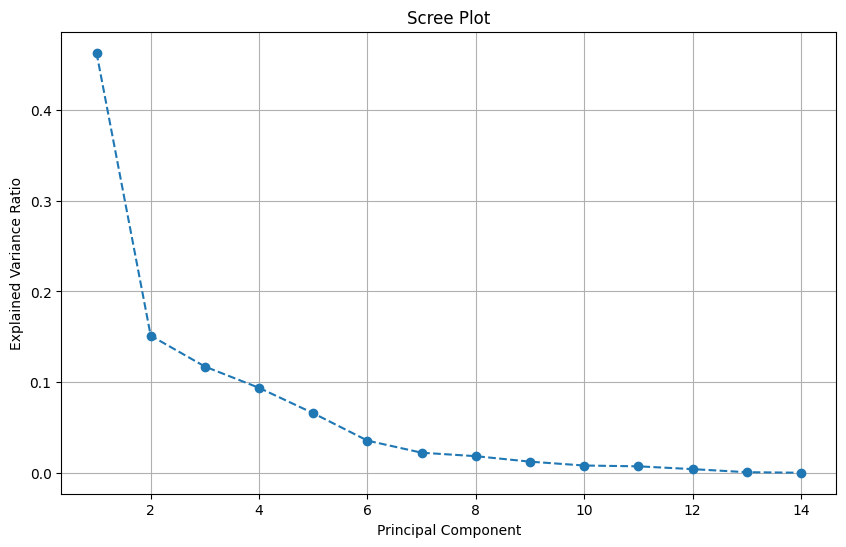

In [ ]:
# 주성분 여러 개 만들 때

pca_full = PCA().fit(X)
explained_variance_ratio = pca_full.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()
# 경사가 완만해지는 지점 주성분 개수 2개

In [ ]:
explained_variance_ratio.round(2) *100
# 2개일 경우 61%
# 3개일 경우 73%
# 4개일 경우 82%

array([46., 15., 12.,  9.,  7.,  4.,  2.,  2.,  1.,  1.,  1.,  0.,  0.,
        0.])

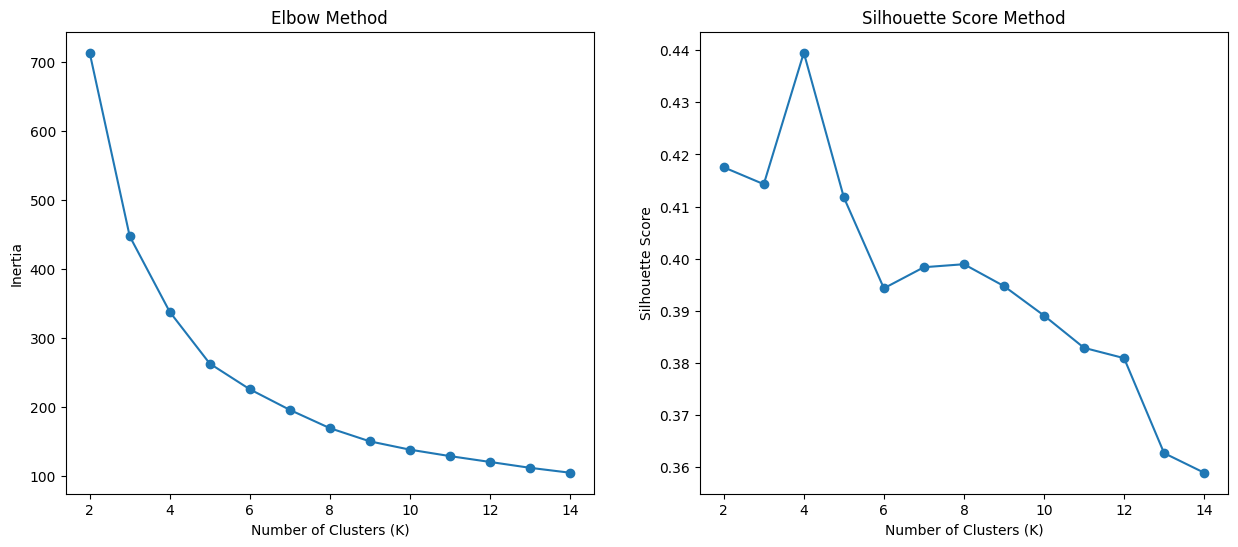

(4,
         PC1       PC2       PC3  cluster
 0 -0.502549 -0.202705  0.078151        2
 1  0.981730 -0.361012 -0.003397        1
 2  0.639220  0.237024 -0.110759        1
 3 -0.712742 -0.142352 -0.242633        2
 4  0.856106 -0.339541 -0.006632        1)

In [ ]:
# 주성분만 학습시키기

X_pca = df_pca[['PC1', 'PC2','PC3']]
# X_pca = df_pca[['PC1','PC2','PC3','PC4']]


inertia = []
silhouette_scores = []

K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, cluster_labels))

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Elbow method plot
axes[0].plot(K_range, inertia, marker='o')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')

# Silhouette score plot
axes[1].plot(K_range, silhouette_scores, marker='o')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score Method')

plt.show()

optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
df_pca['cluster'] = kmeans_final.fit_predict(X_pca)

optimal_k, df_pca.head()

# 주성분 2개일 시 실루엣 스코어 0.53, 최적 군집 3개
# 주성분 3개일 시 실루엣 스코어 0.44, 최적 군집 4개
# 주성분 4개일 시 실루엣 스코어 0.38  최적 군집 2개

In [ ]:
df_pca.cluster.value_counts()

,count
cluster,
0,1263
1,759
2,737
3,294


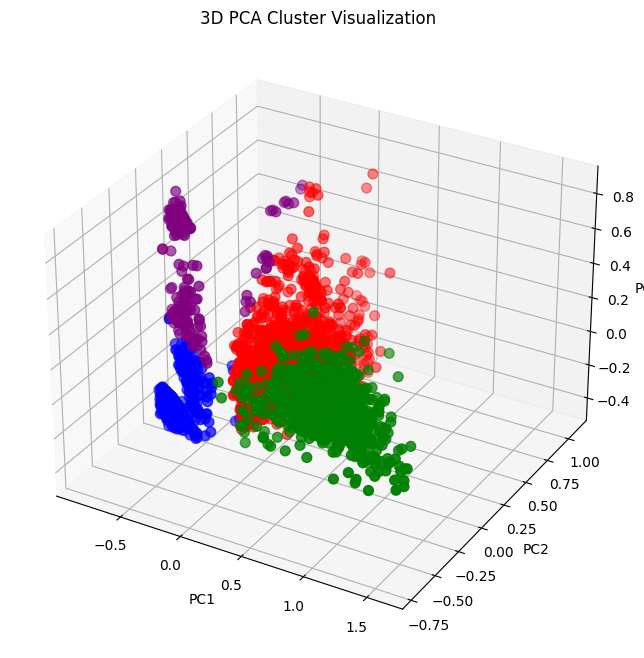

In [ ]:
# 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'purple'}
colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'purple',4: 'orange'}
# colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'purple', 4: 'orange', 5:'yellow'}

ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['cluster'].apply(lambda x: colors.get(x, 'black')), s=50)


ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.set_title('3D PCA Cluster Visualization')

plt.show()

In [ ]:
df_pca.cluster.value_counts()

,count
cluster,
0,929
3,747
2,557
1,485
4,335


In [ ]:
# 클러스터 정보 병합

df_pca2=df_pca.iloc[:,3:]
temp=df.merge(df_pca2,left_index=True,right_index=True)
temp.drop(columns=['avg_response_time'],inplace=True)
# temp.groupby('cluster').mean(numeric_only=True)

cluster_means = temp.groupby('cluster').mean(numeric_only=True)
cluster_medians = temp.groupby('cluster').median(numeric_only=True)


In [ ]:
display(temp.groupby('cluster').mean(numeric_only=True).T.round(2))
display(temp.groupby('cluster').median(numeric_only=True).T.round(2))

cluster,0,1,2,3
months_with_sale,4.10,12.39,1.66,1.73
recency,136.31,37.11,208.67,199.98
frequency,9.10,112.77,2.42,2.27
monetary,2267.57,21679.35,805.36,830.11
delayed_count,0.52,7.56,0.15,0.13
delay_rate,0.06,0.07,0.06,0.07
payment_mix_index,0.93,0.95,0.00,0.06
payment_concentration,0.69,0.76,1.00,0.98
unique_category_count,1.79,3.75,1.16,1.16
avg_review_score,4.05,4.06,3.87,4.00


cluster,0,1,2,3
months_with_sale,4.00,12.00,1.00,1.00
recency,55.00,13.00,137.00,136.00
frequency,7.00,57.00,1.00,2.00
monetary,1203.17,10899.03,259.12,282.82
delayed_count,0.00,3.00,0.00,0.00
delay_rate,0.00,0.06,0.00,0.00
payment_mix_index,0.92,0.98,-0.00,-0.00
payment_concentration,0.69,0.76,1.00,1.00
unique_category_count,1.00,3.00,1.00,1.00
avg_review_score,4.22,4.10,4.33,4.50


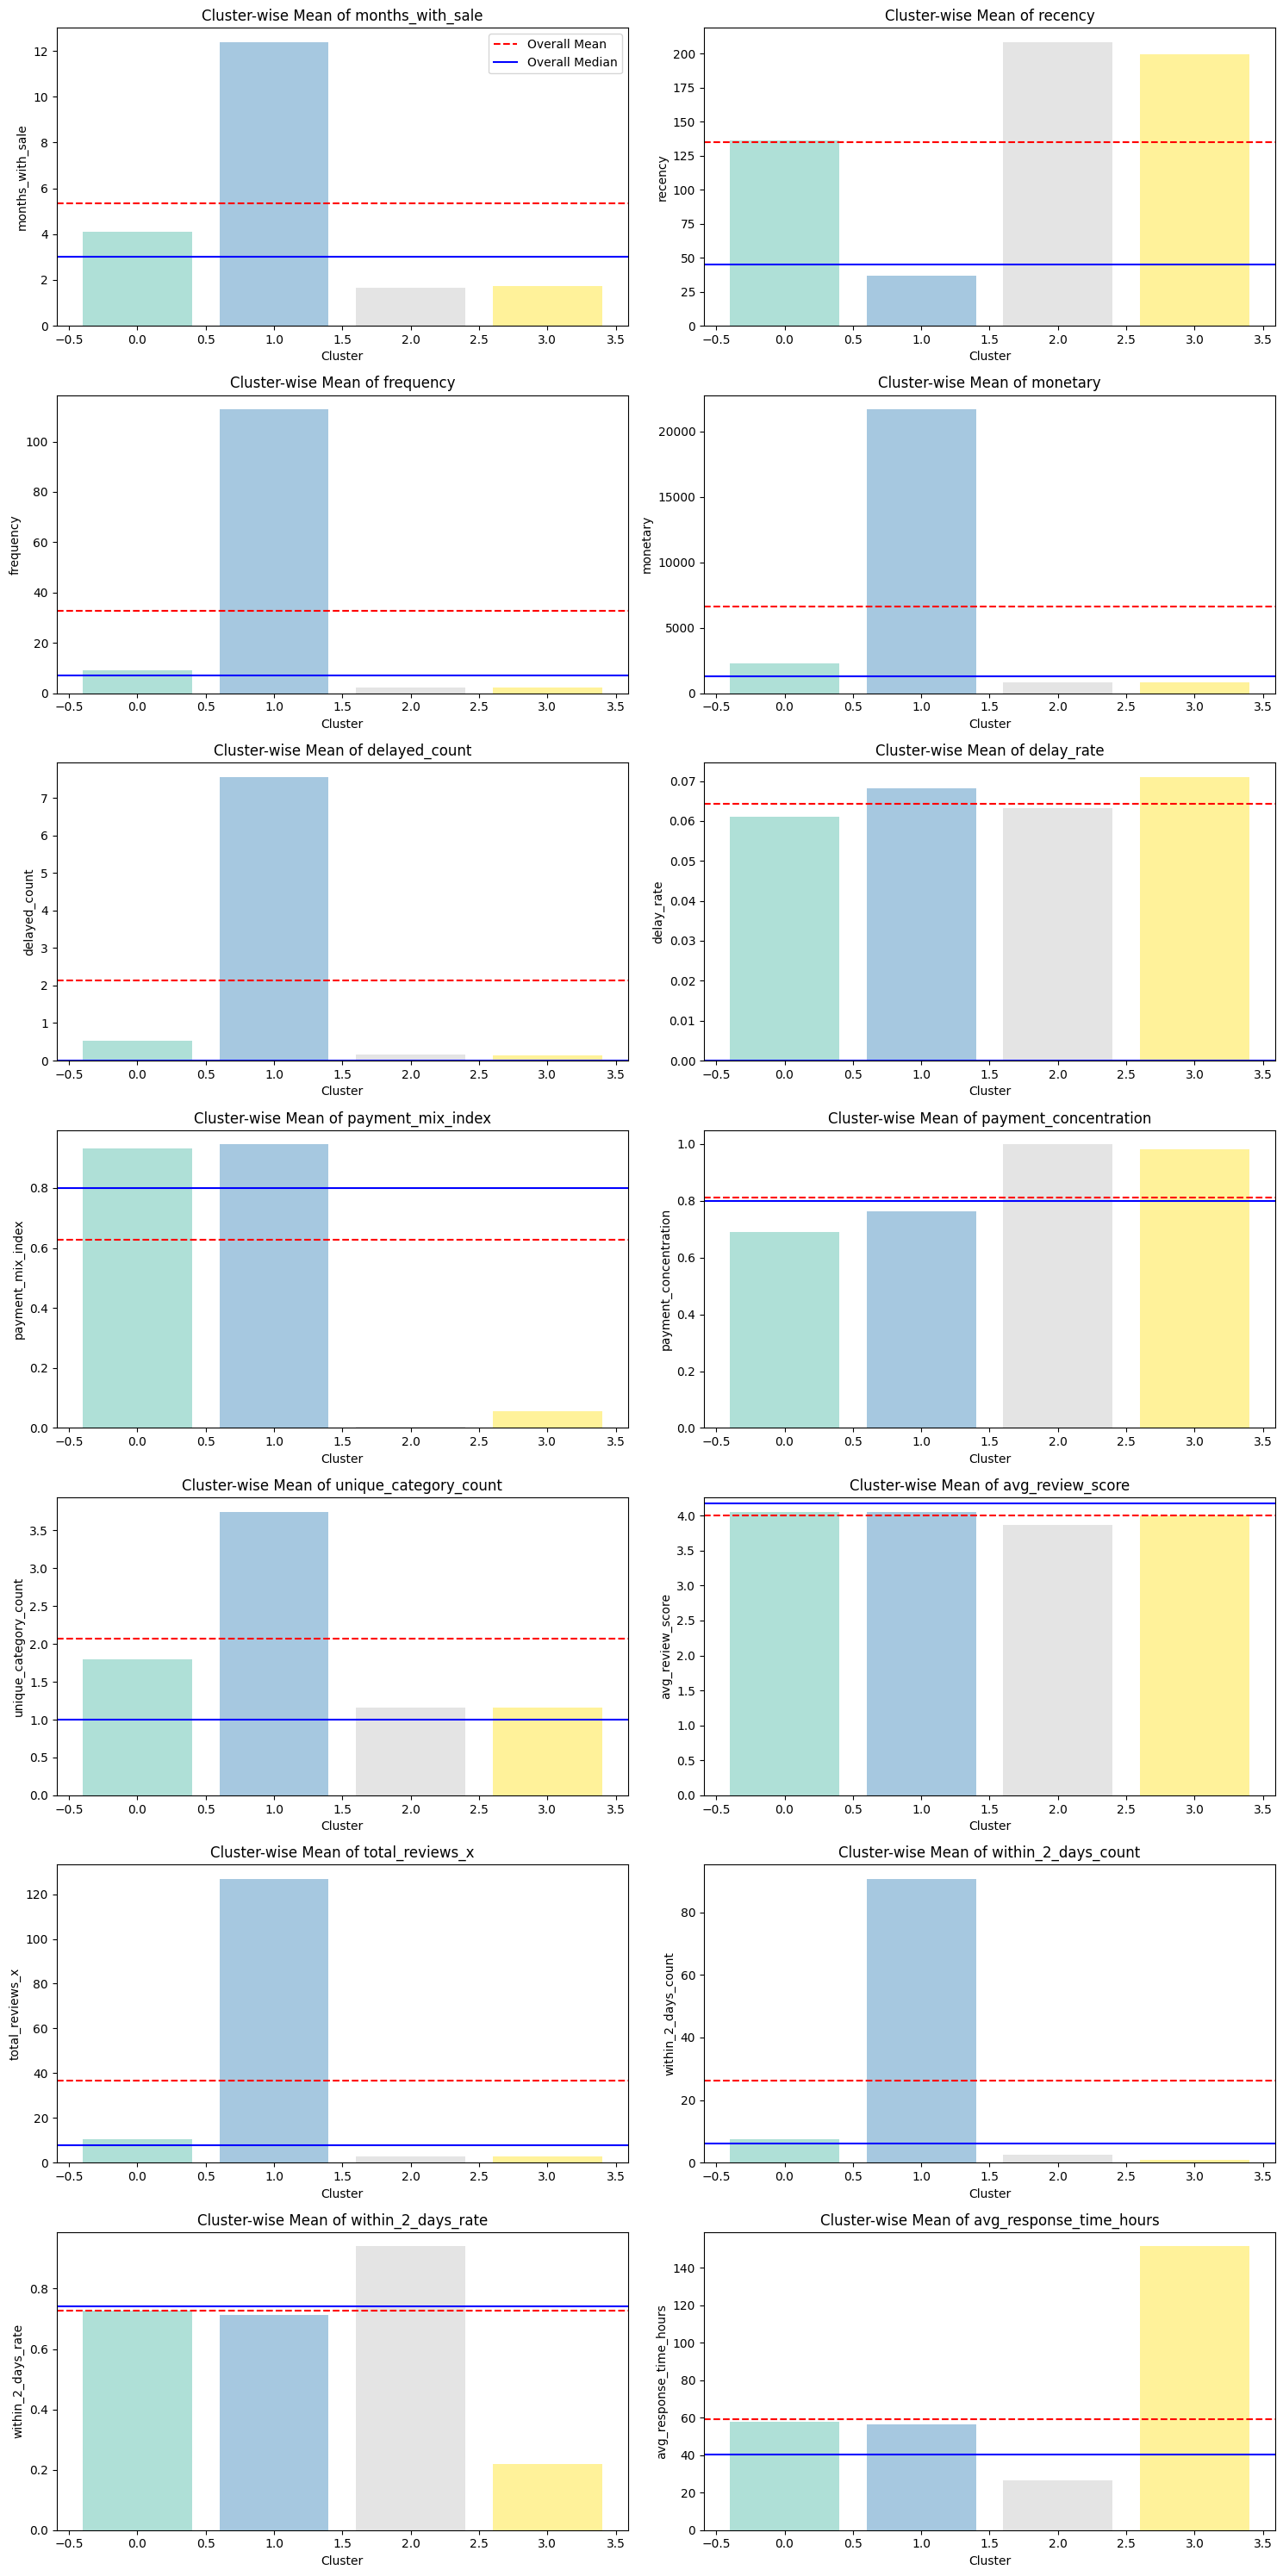

In [ ]:
# 군집별 특성 시각화

overall_means = temp.mean(numeric_only=True)
overall_medians = temp.median(numeric_only=True)


num_columns = cluster_means.shape[1]
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 30))

colors = plt.cm.get_cmap('Set3', cluster_means.shape[0])

for i, column in enumerate(cluster_means.columns):
    ax = axes[i//2, i%2]

    bars = ax.bar(cluster_means.index, cluster_means[column], color=colors.colors, alpha=0.7)

    ax.axhline(y=overall_means[column], color='red', linestyle='--', label=f'Overall Mean')
    ax.axhline(y=overall_medians[column], color='blue', linestyle='-', label=f'Overall Median')

    ax.set_title(f'Cluster-wise Mean of {column}')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(column)

    if i == 0:
      ax.legend(loc='upper right')

for j in range(i + 1, 14):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [ ]:
# from yellowbrick.cluster import KElbowVisualizer

# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(2,15),metric='silhouette')
# visualizer.fit(X_selected )
# visualizer.set_title("KElbowVisualizer using Silhouette Score for Optimal K")
# visualizer.show()

In [ ]:
import pandas as pd
import scipy.stats as stats

numeric_columns = temp.select_dtypes(include=['float64', 'int64']).columns

anova_results = []

for column in numeric_columns:
    if column != 'cluster':

        # 군집별로 데이터를 분리
        groups = [temp[temp['cluster'] == cluster][column] for cluster in temp['cluster'].unique()]

        # ANOVA 수행
        f_val, p_val = stats.f_oneway(*groups)

        anova_results.append({
            'Variable': column,
            'F-value': f_val.round(2),
            'p-value': p_val.round(5)
        })


anova_df = pd.DataFrame(anova_results)
anova_df = anova_df.sort_values(by='F-value',ascending=False)
anova_df.reset_index(drop=True,inplace=True)
display(anova_df)


,Variable,F-value,p-value
0,payment_mix_index,4107.57,0.00000
1,months_with_sale,2463.63,0.00000
2,payment_concentration,1906.01,0.00000
3,within_2_days_rate,1428.54,0.00000
4,unique_category_count,299.56,0.00000
5,frequency,240.87,0.00000
6,within_2_days_count,234.54,0.00000
7,total_reviews_x,233.88,0.00000
8,monetary,196.00,0.00000
9,delayed_count,186.90,0.00000


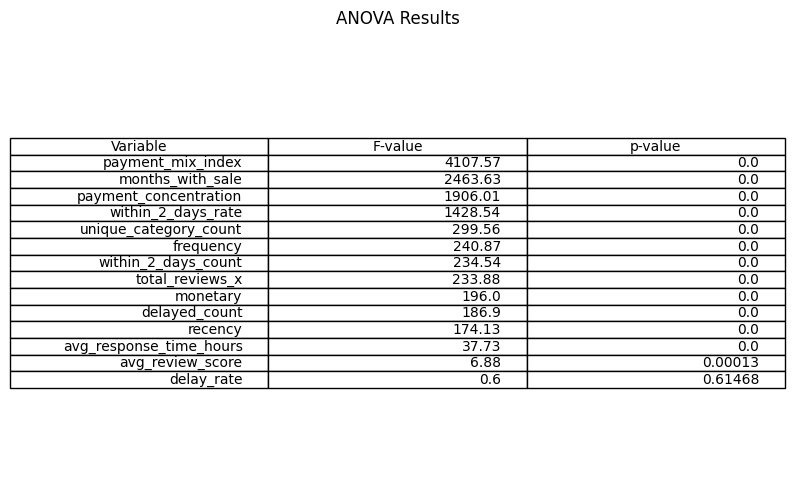

In [ ]:
# anova_df

plt.figure(figsize=(10, 6))
plt.table(cellText=anova_df.values, colLabels=anova_df.columns, loc='center')
plt.title('ANOVA Results')
plt.axis('off')
plt.show()
